# Сборный проект №1

#### Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  

#### Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Описание данных: 
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

#### План исследования:
1. Выявить актуальный период для проведения анализа
2. Изучить продажи игр по различным платформам:
    - Найти актуальные платформы на конец рассматриваемого периода
    - Выявить среднее время актуальности платформ
    - Выявить связь между продажами игр и оценками (пользователей и критиков) и рейтингом ESRB
3. Выявить типичный портрет покупателей по регионам (Северная Америка, Европа, Япония)
4. Статистический анализ:
    - Проверить, отличаются ли средние оценки пользователей на XBOX ONE и PC
    - Проверить, отличаются ли средние оценки пользователей в жанрах Action и Shooter
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from math import log as log
import seaborn as sns

In [2]:

display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


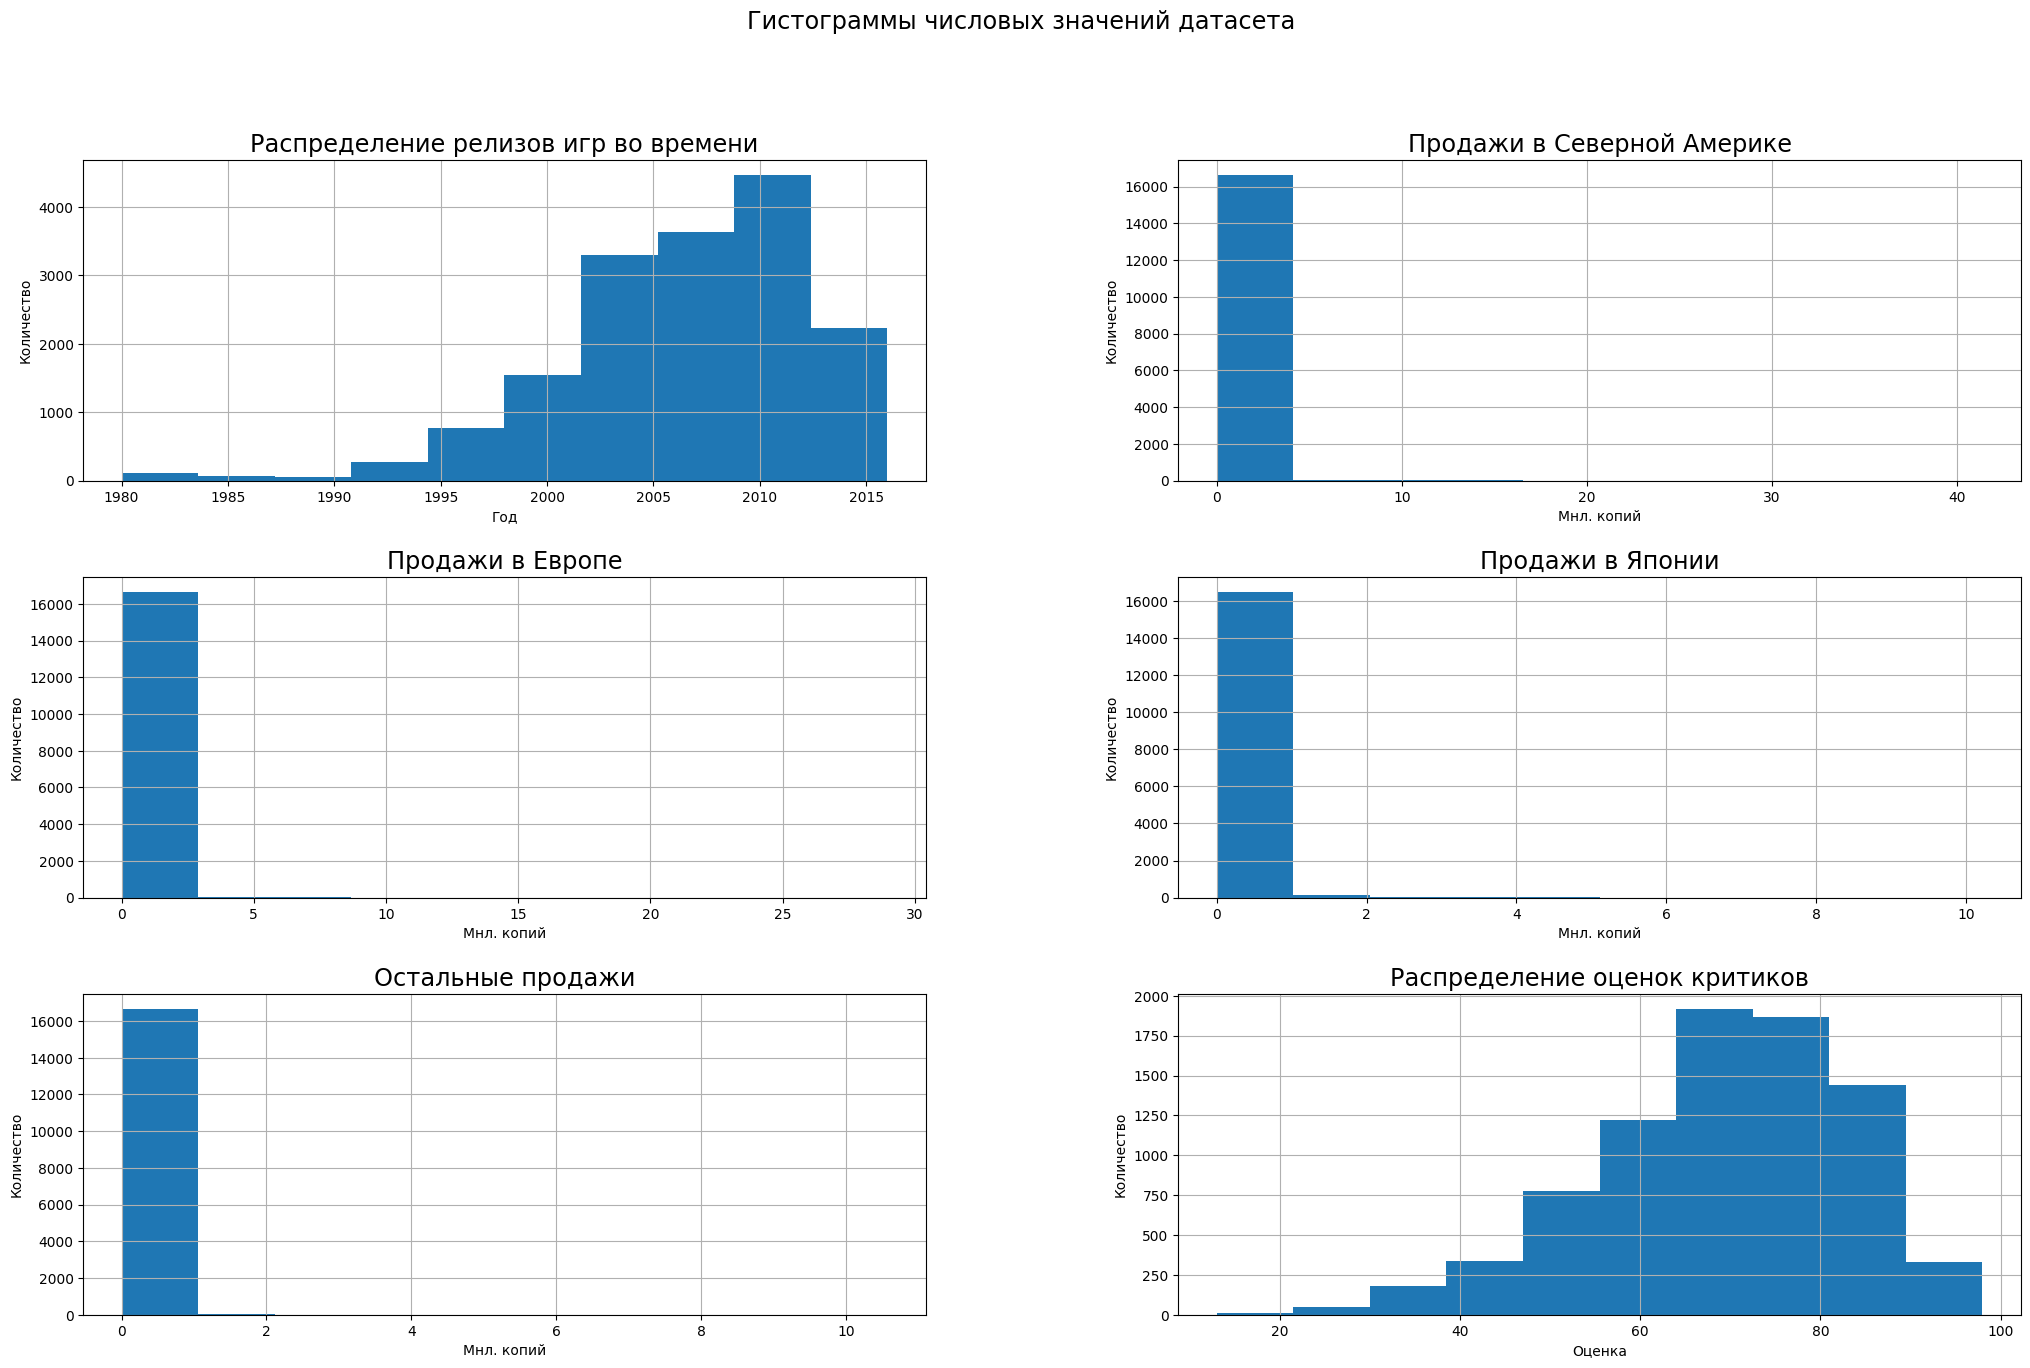

In [3]:
axes = data.hist(figsize = (25,15))
axes[0,0].set_title('Распределение релизов игр во времени',  fontsize='xx-large')
axes[0,0].set_xlabel('Год')
axes[0,0].set_ylabel('Количество')

axes[0,1].set_title('Продажи в Северной Америке', fontsize='xx-large')
axes[0,1].set_xlabel('Мнл. копий')
axes[0,1].set_ylabel('Количество')

axes[1,0].set_title('Продажи в Европе', fontsize='xx-large')
axes[1,0].set_xlabel('Мнл. копий')
axes[1,0].set_ylabel('Количество')

axes[1,1].set_title('Продажи в Японии', fontsize='xx-large')
axes[1,1].set_xlabel('Мнл. копий')
axes[1,1].set_ylabel('Количество')

axes[2,0].set_title('Остальные продажи', fontsize='xx-large')
axes[2,0].set_xlabel('Мнл. копий')
axes[2,0].set_ylabel('Количество')

axes[2,1].set_title('Распределение оценок критиков', fontsize='xx-large')
axes[2,1].set_xlabel('Оценка')
axes[2,1].set_ylabel('Количество')

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

## Подготовка данных


In [4]:
#заменим названия столбцов 
data.columns = data.columns.str.lower()
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [5]:
#переведем год издания в int64
#удалим игры без года выпуска
print('Удалено игр без года выпуска:',data['year_of_release'].isna().sum())
data = data.dropna(subset=['year_of_release']) 
data['year_of_release'] = data['year_of_release'].astype('int')


Удалено игр без года выпуска: 269


### Обработка пропусков

Доля пропущенных значений в столбцах
name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.51
user_score         0.40
rating             0.41
dtype: float64


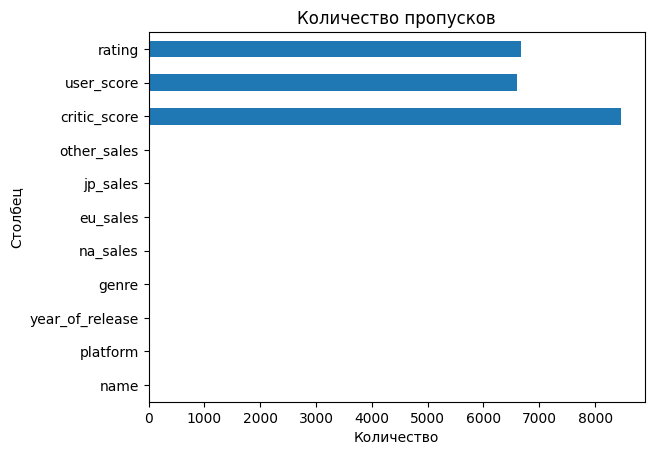

In [6]:
print('Доля пропущенных значений в столбцах')
print(((data.isna().sum())/len(data)).round(2))
data.isna().sum().plot(kind = 'barh', 
                       title = 'Количество пропусков')
plt.ylabel('Столбец')
plt.xlabel('Количество')
plt.show()

In [7]:
data[(data['user_score'].isna())]['genre'].value_counts()

genre
Action          1143
Misc             852
Adventure        839
Sports           819
Role-Playing     714
Fighting         405
Racing           368
Strategy         329
Platform         319
Shooter          296
Simulation       285
Puzzle           236
Name: count, dtype: int64


<b> Наблюдаем большое количество пропусков в данных об оценках игр. Их сложно заполнить, поэтому оставим как есть. Эти данные заполнялись из открытых источников, следовательно, оценки непопулярных игр или игр для не популярных платформ могли не попасть в данные. Больше всего игр без оценок и рейтингов находится в жанре Action.

In [8]:
data['user_score'].value_counts().head()

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: count, dtype: int64


<b> tbd? тетрабромдибензофуран? 
    
TBD = to be determined = будет определено. Значительная часть игр имеет временный идентификатор оценки пользователей. Заменим его на NaN

In [9]:

data.loc[data['user_score'] =='tbd','user_score'] = np.nan
print('Пропусков в user_score после обновления:', data['user_score'].isna().sum())

Пропусков в user_score после обновления: 8983


In [10]:
#переведем user_score в float
data['user_score'] = data['user_score'].astype('float')

In [11]:
#удалим строки без имени
data[data['name'].isna()]
data = data.dropna(subset=['name'])

In [12]:
#сохраним создание ситетических данных, но будем использовать заполнение заглушкой
#заполним рейтинг самым популярным по жанру
#for el in data['genre'].unique():
    #после метода mode() выходит класс object. Берем нулевой элемент, чтобы забрать только значение.
    #rating =  data.loc[data['genre'] == el, 'rating'].mode()[0]
    #data.loc[(data['rating'].isna())&(data['genre'] == el), 'rating'] = rating

In [13]:
#заменим пропуски в рейтинге на UN - unrated
data.loc[data['rating'].isna(), 'rating'] = 'UN'

In [14]:
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64



<b> Итог: удалили игры без жанра, названия и года выпуска. Пропуски в возрастном рейтинге заполнили на UN. Пропуски в оценках критиков и пользователей заполнить нельзя. 

### Добавление столбцов

In [15]:
#добавим столбец с суммарными продажами по всем регионам
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UN,31.38


<b> Вывод:
    
    
В ходе предобработки были выявлены пропуски в столбцах critic_score, user_score, rating и year_of_release: 
- Игры без года релиза были удалены 
- Пропуски в rating заменены на значение UN - unrated
- Пропуски в critic_score, user_score заполнить невозможно. Пропущено более 50% данных. 

Данные в рассматриваемых столбцах заполнялись из открытых источников, что может быть причиной образования пропусков. Рейтинг ESRB составляется в Северной Америке для актуальных игр на данном рынке, следовательно, не все игры будут обладать рейтингом от данной организации. 
    
    

## Анализ данных

###  Сколько игр выпускалось в разные годы?

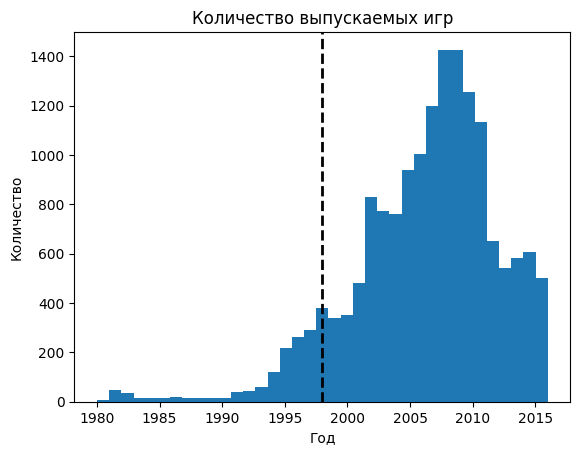

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

In [16]:

ax = data['year_of_release'].plot(kind = 'hist', 
                             title = 'Количество выпускаемых игр', bins = len(data['year_of_release'].unique()))
ax.axvline(x=1998, color='black', linewidth=2, linestyle='--')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()
data['year_of_release'].describe()
data['year_of_release'].value_counts()



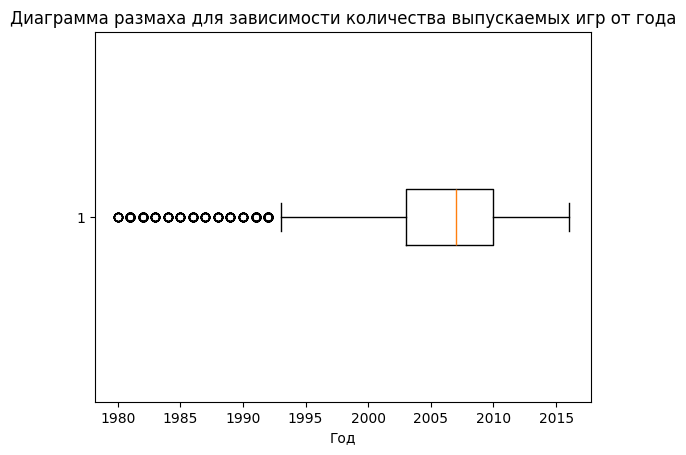

In [17]:
plt.boxplot(data['year_of_release'], vert = False)
plt.title('Диаграмма размаха для зависимости количества выпускаемых игр от года')
plt.xlabel('Год')
plt.show()

<b> В период с 1980 до 1998 выпускалось слишком мало игр. Рассматривать этот диапазон нет смысла. С помощью построения диаграммы размаха был найден период со слишком малыми значениями (с 1980 по 1992). Наибольшее количество игр было выпущено в 2008 и 2009 году. 
    

Примем период с 2012 по 2016 за актуальный и будем использовать его в анализе продаж на актуальных платформах




### Как менялись продажи по платформам?

#### Построим столбчатые диаграммы по платформам и их суммарным продажам

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


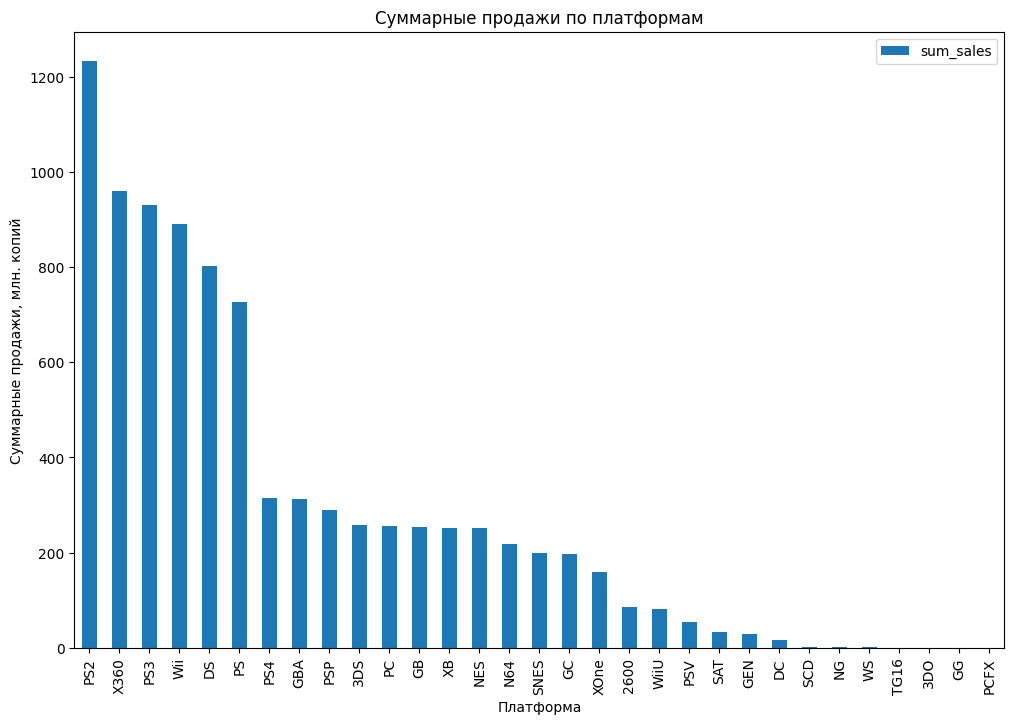

In [18]:
#создадим сводную таблицу по суммарным продажам платформ за весь период наблюдений
platform_pivot = pd.pivot_table(data = data, index = 'platform', values = 'sum_sales', aggfunc = 'sum')
platform_pivot = platform_pivot.sort_values(by = 'sum_sales', ascending=False)
display(platform_pivot.head(5))

platform_pivot.plot(kind = 'bar', figsize = (12,8))
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Суммарные продажи по платформам')
plt.show()

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


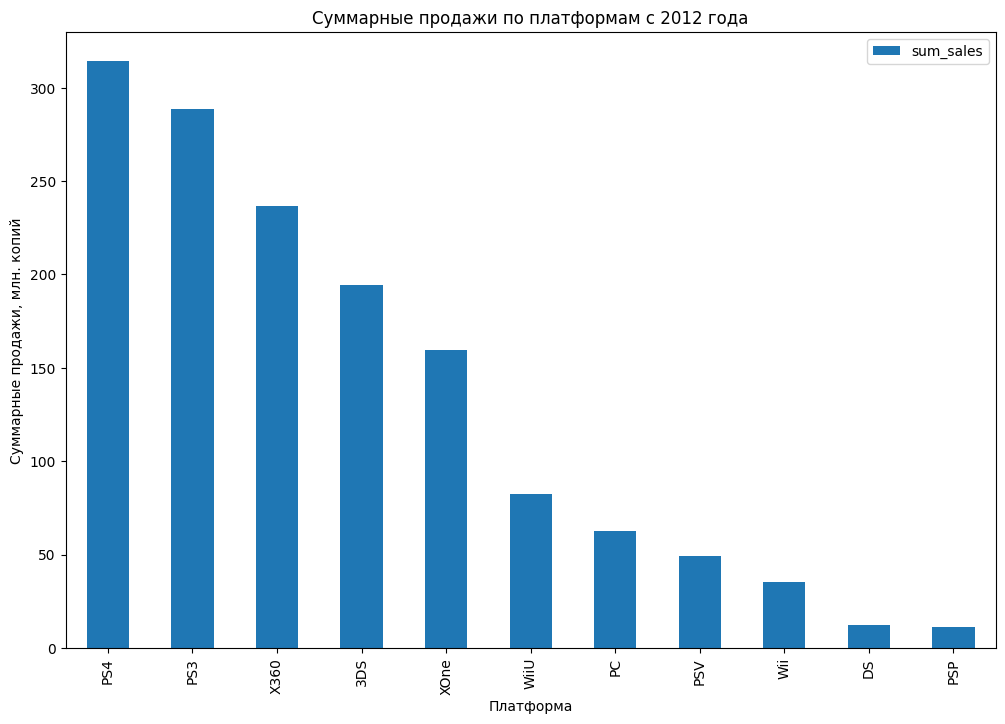

In [19]:
#создадим сводную таблицу по суммарным продажам платформ с 2012 по 2016 год
data_actual = data.query('year_of_release > 2011')
platform_pivot_actual = pd.pivot_table(data = data_actual, index = 'platform', values = 'sum_sales', aggfunc = 'sum')
platform_pivot_actual = platform_pivot_actual.sort_values(by = 'sum_sales', ascending=False)
display(platform_pivot_actual.head(5))

platform_pivot_actual.plot(kind = 'bar', figsize = (12,8))
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.title('Суммарные продажи по платформам с 2012 года')
plt.show()

<b> В актуальном периоде наибольшее количество проданных игр было выпущено для PS4. В топ 5 входят консоли прошлого поколения PS3 и XBOX360, а также 3DS и XBOXOne.

#### Изучим продажи по некоторым платформам, чтобы определить среднее время актуальности. Для этого необходимо рассмотреть данные за весь период.

##### Рассмотрим Play Station

In [20]:
#создадим новую сводную таблицу по годам и суммарным продажам
platform_year_pivot = pd.pivot_table(data = data, 
                                     index = ['platform','year_of_release'], 
                                     values = 'sum_sales', aggfunc = 'sum')
platform_year_pivot.head()

sum_sales
platform year_of_release           
2600     1980                 11.38
         1981                 35.68
         1982                 28.88
         1983                  5.84
         1984                  0.27

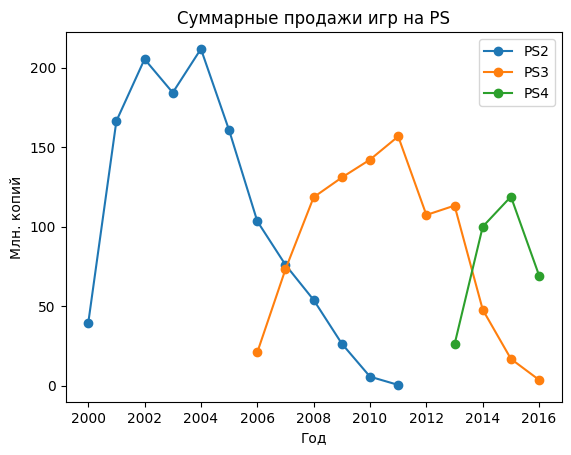

In [21]:
ax = platform_year_pivot.loc['PS2'].plot(style = 'o-')
platform_year_pivot.loc['PS3'].plot(style = 'o-', ax = ax,  )
platform_year_pivot.loc['PS4'].plot(style = 'o-', ax = ax,  
                                    title = 'Суммарные продажи игр на PS')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.legend(['PS2', 'PS3', 'PS4'])
plt.show()

##### Рассмотрим XBOX360

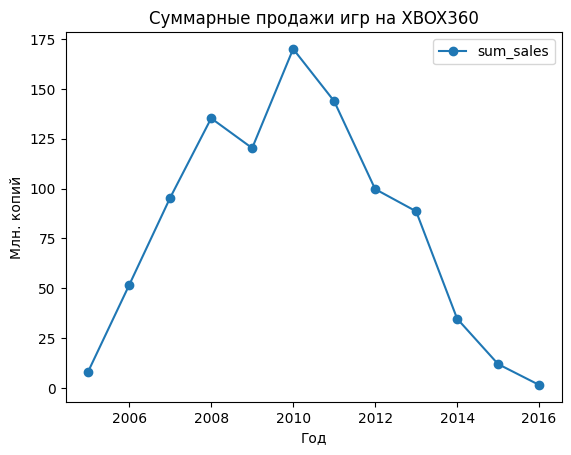

In [22]:
platform_year_pivot.loc['X360'].plot(style = 'o-', 
                                    title = 'Суммарные продажи игр на XBOX360')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.show()

##### Рассмотрим Wii

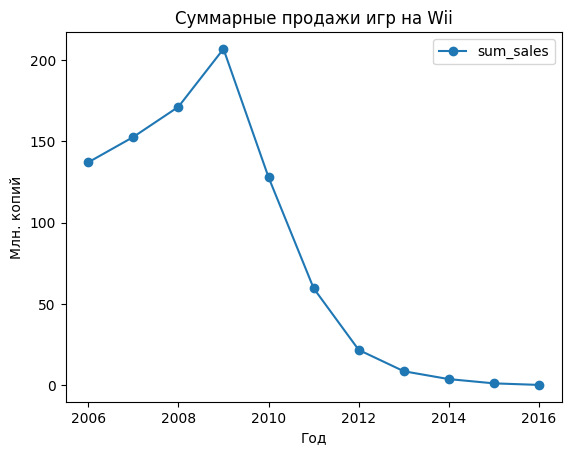

In [23]:
platform_year_pivot.loc['Wii'].plot(style = 'o-',
                                    title = 'Суммарные продажи игр на Wii')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.show()

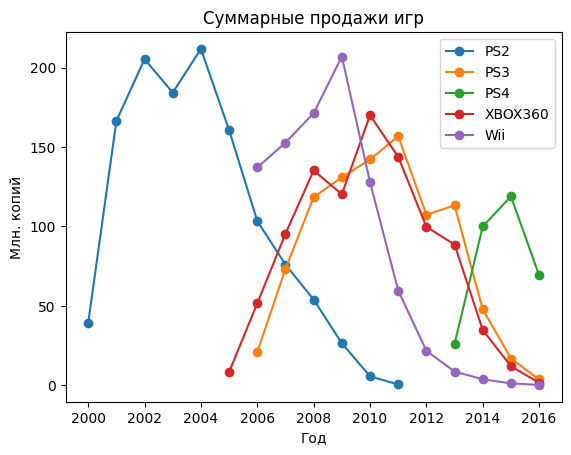

In [24]:
#объединим все на один график
ax = platform_year_pivot.loc['PS2'].plot(style = 'o-')
platform_year_pivot.loc['PS3'].plot(style = 'o-', ax = ax)
platform_year_pivot.loc['PS4'].plot(style = 'o-', ax = ax)
platform_year_pivot.loc['X360'].plot(style = 'o-', ax = ax)
platform_year_pivot.loc['Wii'].plot(style = 'o-', ax = ax,
                                    title = 'Суммарные продажи игр')
plt.xlabel('Год')
plt.ylabel('Млн. копий')
plt.legend(['PS2', 'PS3','PS4', 'XBOX360', 'Wii'])
plt.show()

Медианное время актуальности платформы = 7.0 лет


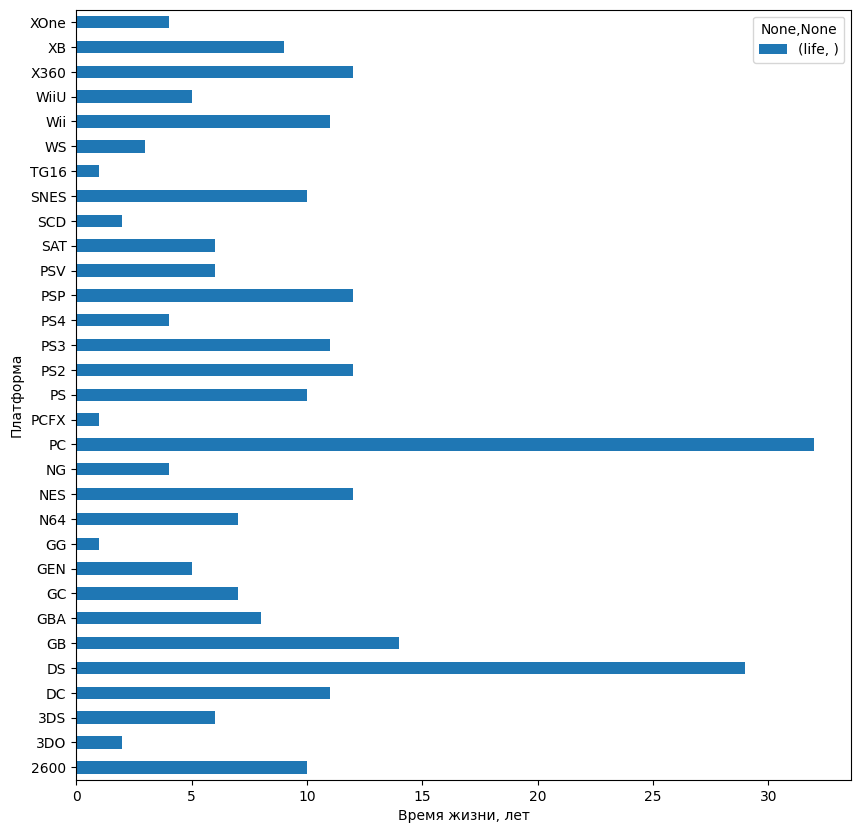

In [25]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 
print('Медианное время актуальности платформы =',time_life['life'].median(), 'лет')

time_life[['platform', 'life']].plot(x = 'platform', kind = 'barh', figsize = (10,10))
plt.ylabel('Платформа')
plt.xlabel('Время жизни, лет')
plt.show()

<b> Медианное время актуальности платформы составило 7 лет. Наибольшее время выявлено у PC и Nintendo DS(около 30 лет). Результат для PC не требует пояснения. Для DS результат настораживает, первый тип консоли был выпущен в 2004 в японии. Следовательно, данные по DS содержат ошибки. 

####  Найдем самые актуальные платформы на 2016 год.

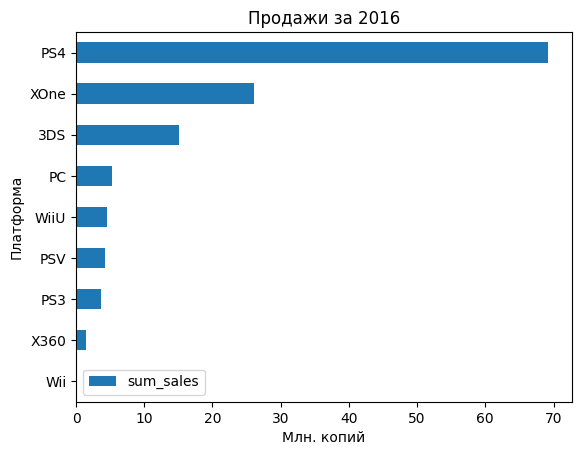

In [26]:
platform_pivot_2016 = pd.pivot_table(data = data_actual.query('year_of_release == 2016'), 
                                     index = 'platform', values = 'sum_sales', aggfunc = 'sum')
platform_pivot_2016 = platform_pivot_2016.sort_values(by = 'sum_sales')
platform_pivot_2016.plot(kind = 'barh',
                         title = 'Продажи за 2016')
plt.xlabel('Млн. копий')
plt.ylabel('Платформа')
plt.show()

<b> Популярные платформы в 2016 году - XBOXone и PS4

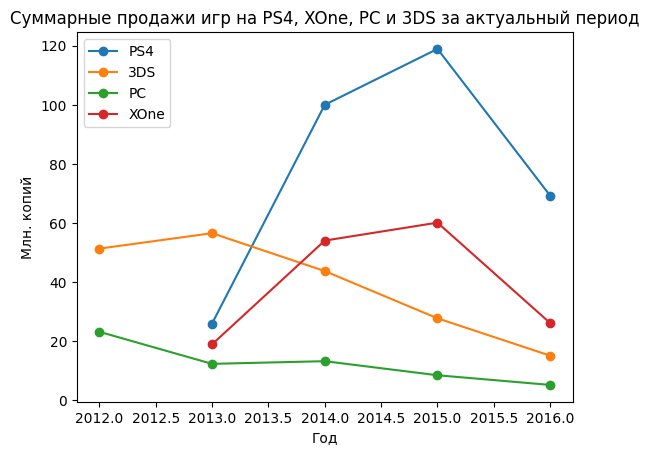

In [27]:
actual_platform_year_pivot = platform_year_pivot.query('year_of_release > 2011')
ax = actual_platform_year_pivot.loc['PS4'].plot(style = 'o-')
actual_platform_year_pivot.loc['3DS'].plot(style = 'o-', ax = ax)
actual_platform_year_pivot.loc['PC'].plot(style = 'o-', ax = ax)
actual_platform_year_pivot.loc['XOne'].plot(style = 'o-', ax = ax,
                                    title = 'Суммарные продажи игр на PS4, XOne, PC и 3DS за актуальный период')
plt.ylabel('Млн. копий')
plt.xlabel('Год')
plt.legend(['PS4', '3DS','PC' ,'XOne'])
plt.show()

<b> Платформыи имеют достаточно высокие суммарные продажи. Однако, наблюдается значительная тенденция на снижение в следующем году. По сравнению с предыдущими моделями, PS4 и XBOXOne имеют меньший период пиковых продаж. В 2017 году можно ожидать дальнейшее снижения продаж по актуальным платформам. В дальнейшем будем рассматривать только PS4, XOne, PC и 3DS.

#### Построим диаграммы размаха для суммарных продаж популярных платформ

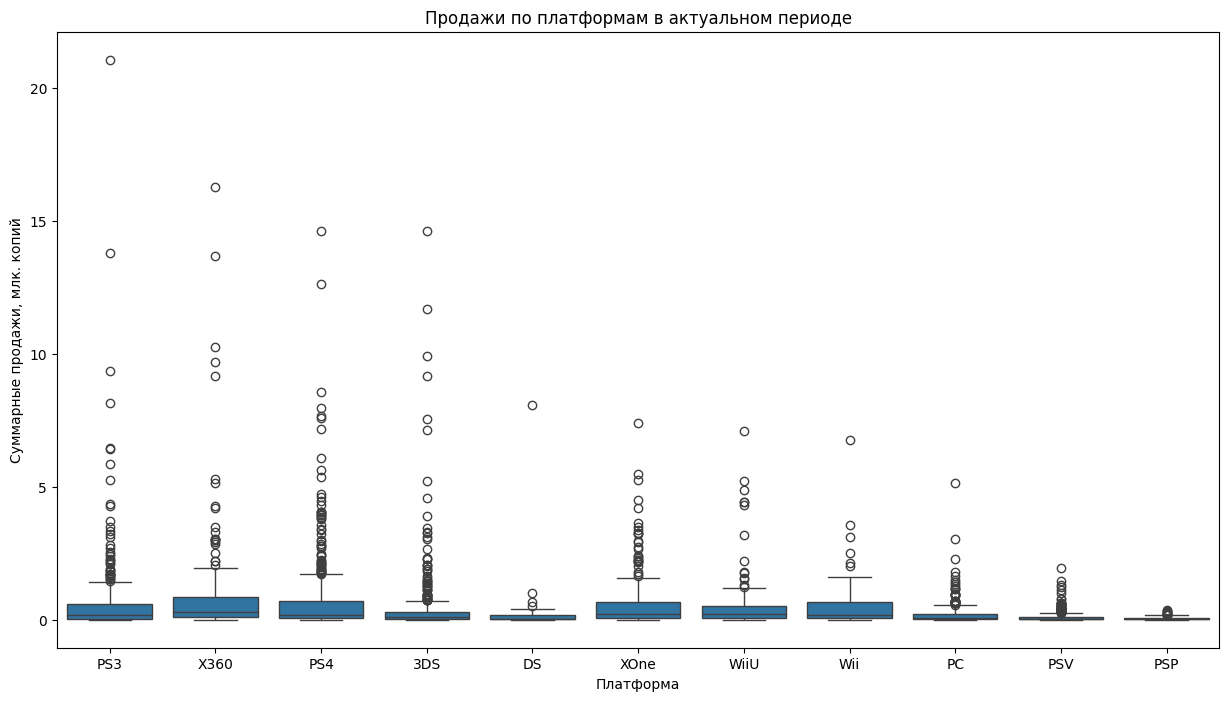

In [63]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'platform', y = 'sum_sales', data = data_actual)
plt.title('Продажи по платформам в актуальном периоде')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млк. копий')
plt.show()

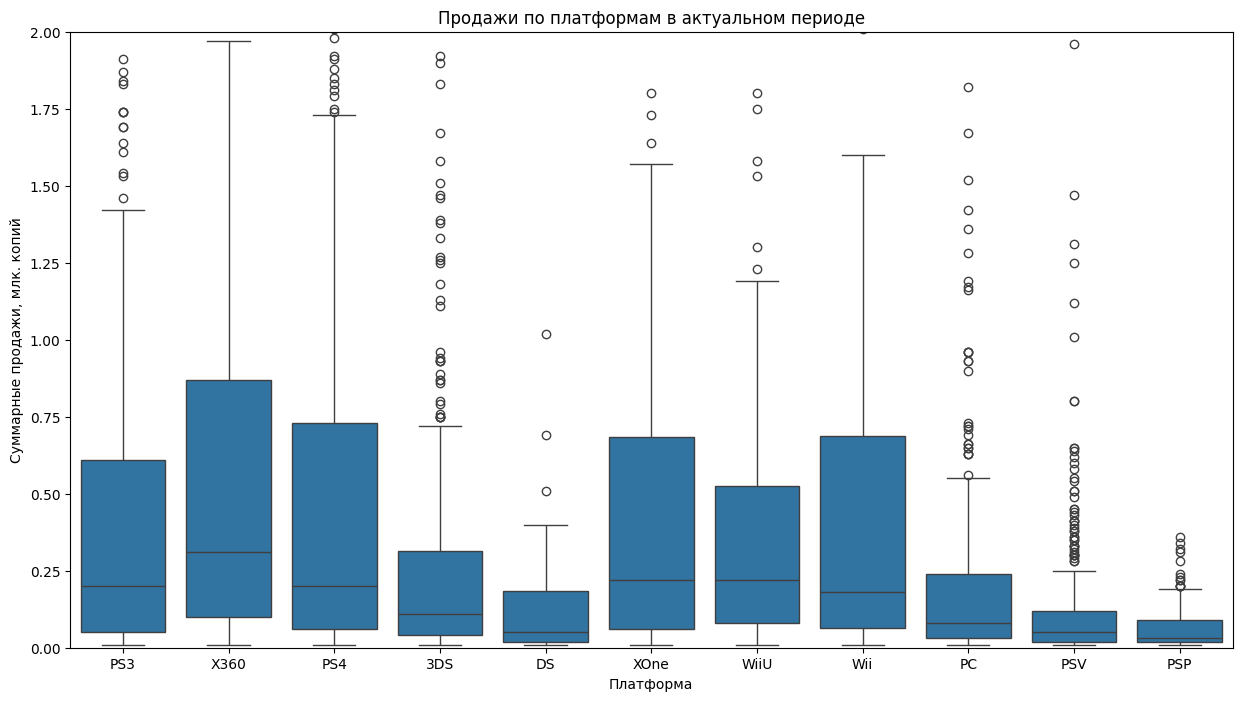

In [29]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'platform', y = 'sum_sales', data = data_actual)
plt.title('Продажи по платформам в актуальном периоде')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млк. копий')
plt.ylim(0,2)
plt.show()

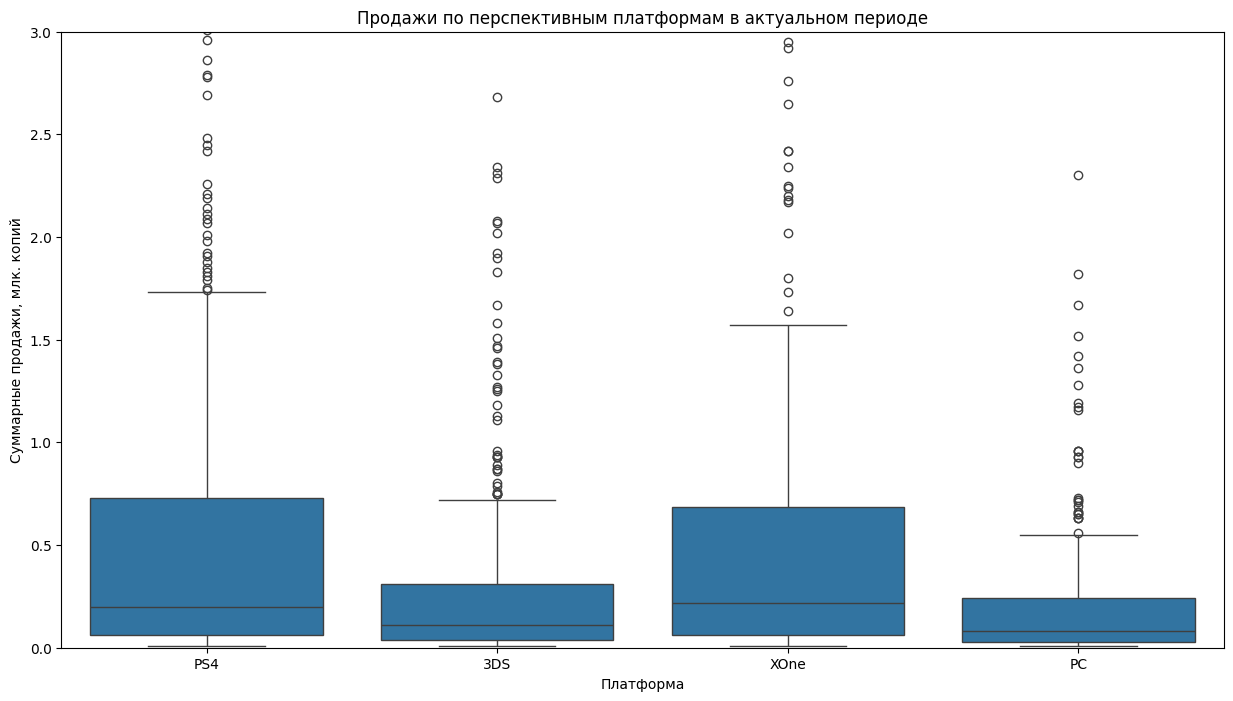

In [30]:
plt.figure(figsize=(15,8))
platforms = ['XOne','PS4', 'PC','3DS']
ax = sns.boxplot(x = 'platform', y = 'sum_sales', data = data_actual.query('platform in @platforms'))
plt.title('Продажи по перспективным платформам в актуальном периоде')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млк. копий')
plt.ylim(0,3)
plt.show()

In [31]:
print('Описательная статистика продаж для PS4')
data_actual.loc[data_actual['platform'] == 'PS4']['sum_sales'].describe()

Описательная статистика продаж для PS4


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

In [32]:
print('Описательная статистика продаж для XBOXOne')
data_actual.loc[data_actual['platform'] == 'XOne']['sum_sales'].describe()

Описательная статистика продаж для XBOXOne


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

In [33]:
print('Описательная статистика продаж для PC')
data_actual.loc[data_actual['platform'] == 'PC']['sum_sales'].describe()

Описательная статистика продаж для PC


count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: sum_sales, dtype: float64

In [34]:
print('Описательная статистика продаж для 3DS')
data_actual.loc[data_actual['platform'] == '3DS']['sum_sales'].describe()

Описательная статистика продаж для 3DS


count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: sum_sales, dtype: float64

<b> В актуальном периоде наибольшими медиальными продажами обладает XBOX360, но данная платформа к концу 2016 года  неактуальна. 
    
Из актуальных на 2016 год платформ выделяются PS4 и XBOXOne. Они обладают высокими уровнями медианы суммарных продаж (разница с 3DS и PC более 50%). Наибольшее количество игр за актуальный период было выпущено для PS4 и 3DS (на 50% больше чем у PC и XBOXOne). Таким образом, самой перспективной консолью можно назвать PS4.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

#### Рассмотрим оценки пользователей

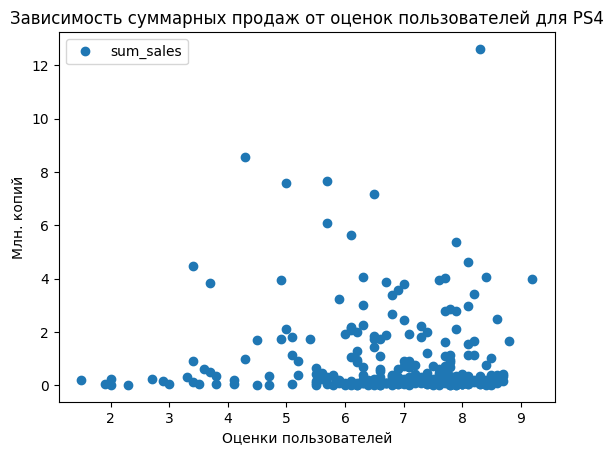

In [35]:
#будем рассматривать PS4.
data_actual.query('platform == "PS4"').plot(y = 'sum_sales', x = 'user_score', style = 'o',
                                            title = 'Зависимость суммарных продаж от оценок пользователей для PS4', 
                                            xlabel = 'Оценки пользователей', ylabel = 'Млн. копий')

plt.show()



In [36]:
#матрица диаграм рассеяния 
#pd.plotting.scatter_matrix(actual_data.query('platform == "PS4"'), figsize=(9, 9)) 
#plt.show()
#не информативна

In [37]:
print('Корреляция между суммарными продажами и пользовательскими оценками для PS4:',
      data_actual.query('platform == "PS4"')['sum_sales'].corr(data_actual.query('platform == "PS4"')['user_score']))

Корреляция между суммарными продажами и пользовательскими оценками для PS4: -0.03195711020455643


<b> Линейной связи между отзывами пользователей и количеством проданных копий нет. Большее количество проданных игр имеет рейтинг 6 и более. 

<b> Рассмотрим другие платформы

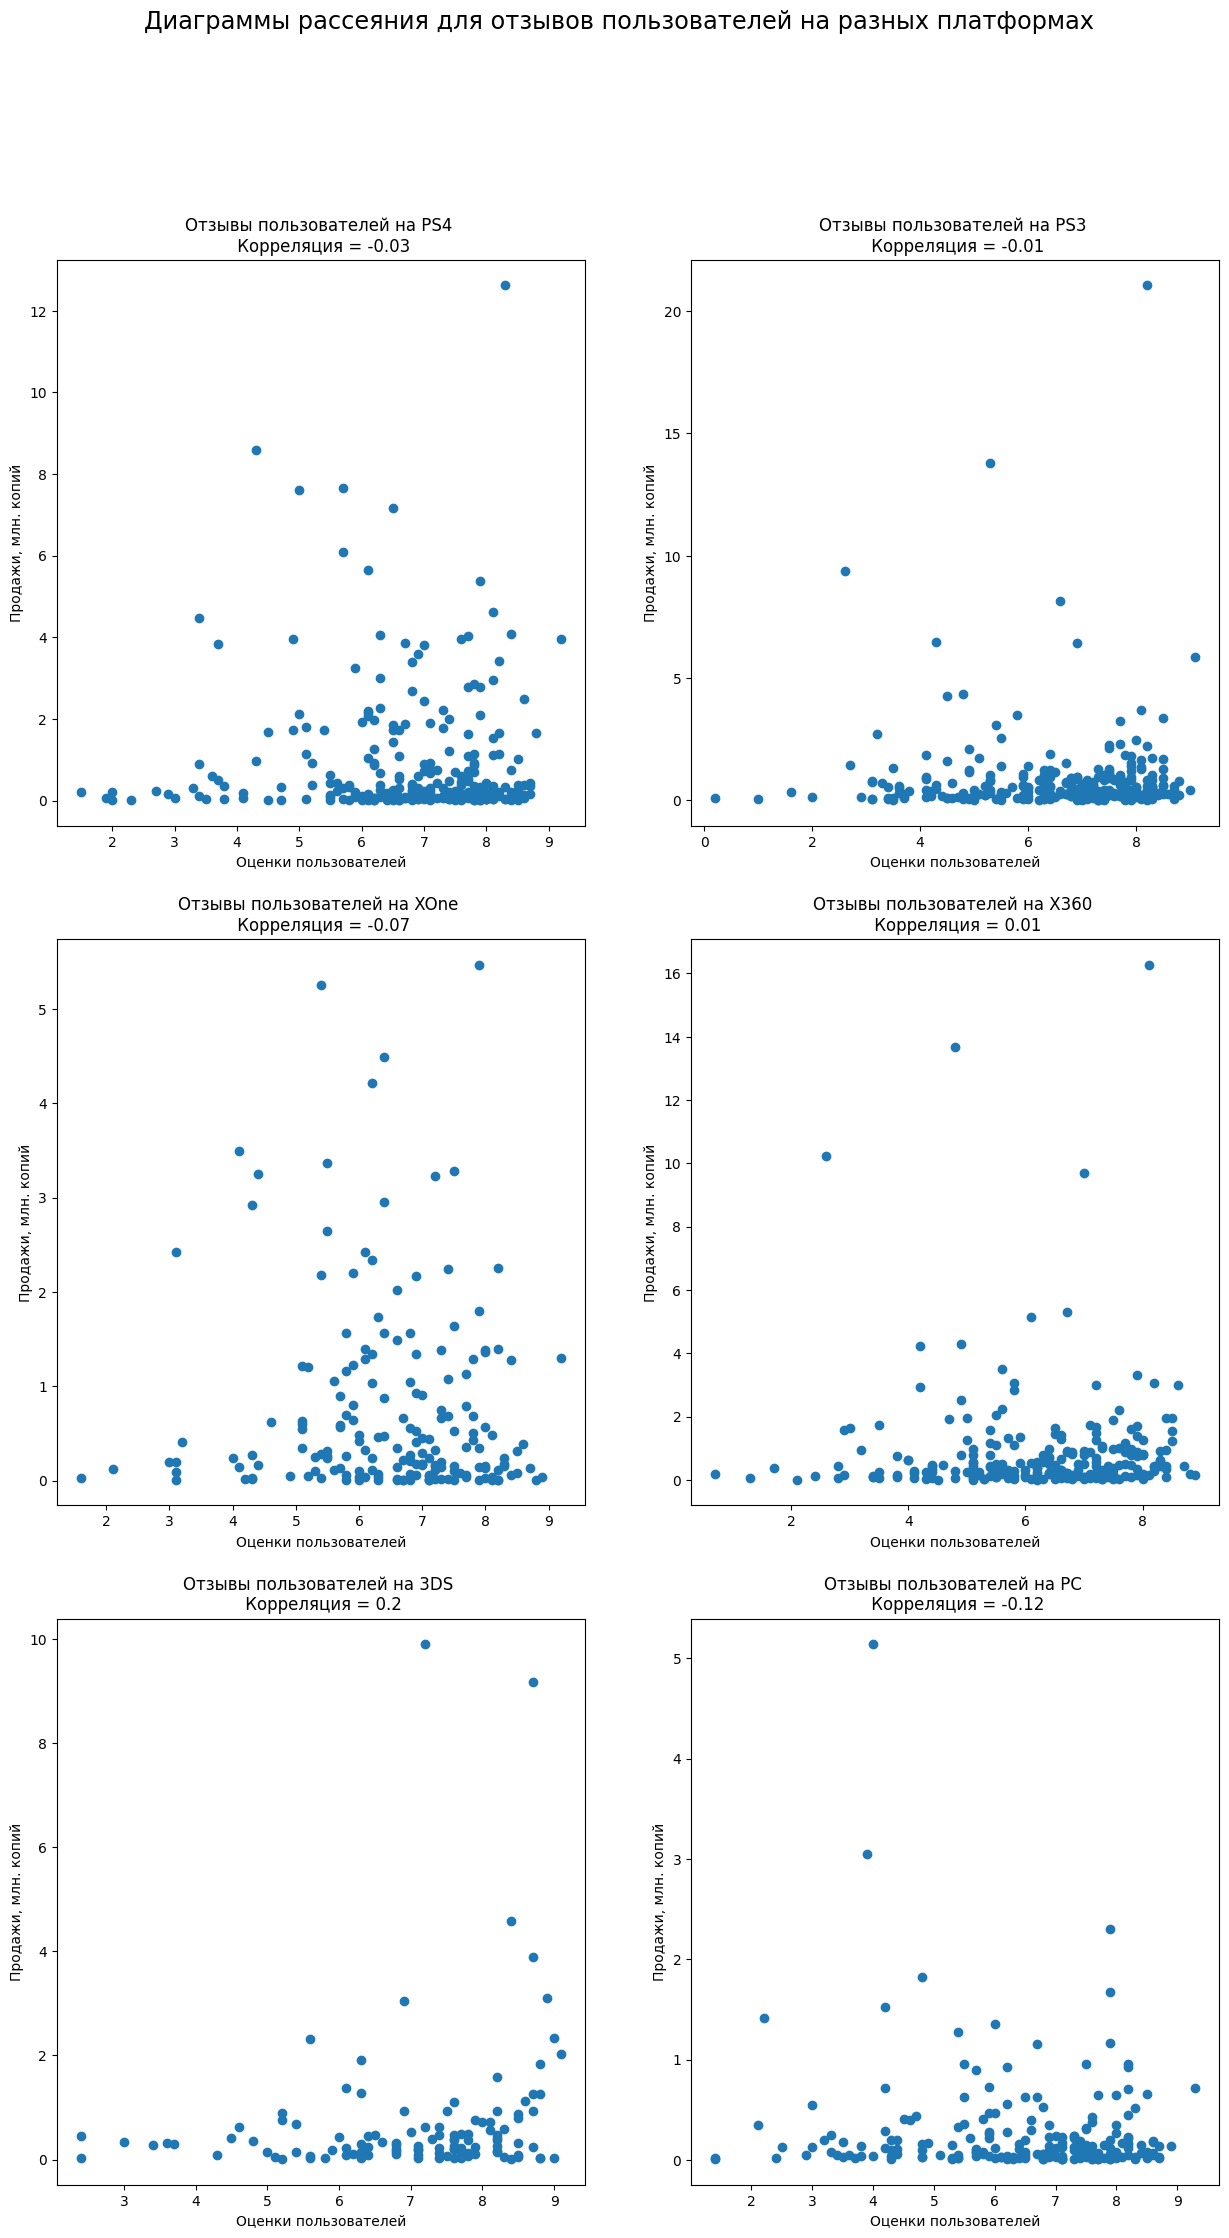

In [38]:
platforms = ['PS4','PS3','XOne','X360','3DS','PC']
plt.figure(figsize=[15, 25])
i = 1
for platform in platforms:
    plt.subplot(3,2,i)
    cor = data_actual.query('platform == @platform')['user_score'].corr(data_actual.query('platform == @platform')['sum_sales'])
    cor = round(cor,2)
    plt.plot(data_actual.query('platform == @platform')['user_score'], data_actual.query('platform == @platform')['sum_sales'], 'o')
    plt.title(f'Отзывы пользователей на {platform} \n Корреляция = {cor}')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи, млн. копий')
    i += 1
plt.suptitle('Диаграммы рассеяния для отзывов пользователей на разных платформах', fontsize='xx-large')
plt.show()

<b> Ни на одной из рассматриваемых платформ не наблюдается корреляции между оценками пользователей и продажами. Максимальный показатель корреляции наблюдается на платформе 3DS. 

#### Рассмотрим оценки критиков

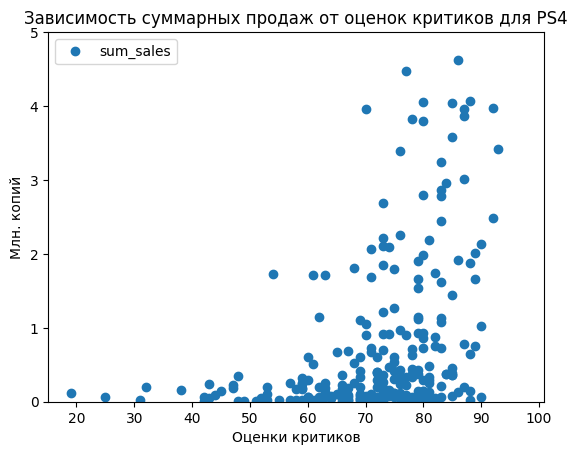

In [39]:
data_actual.query('platform == "PS4"').plot(y = 'sum_sales', x = 'critic_score', style = 'o',
                                            title = 'Зависимость суммарных продаж от оценок критиков для PS4', 
                                            xlabel = 'Оценки критиков', ylabel = 'Млн. копий')
plt.ylim(0,5)
plt.show()


In [40]:
print('Корреляция между суммарными продажами и оценками критиков для PS4:', 
      data_actual.query('platform == "PS4"')['sum_sales'].corr(data_actual.query('platform == "PS4"')['critic_score']))

Корреляция между суммарными продажами и оценками критиков для PS4: 0.4065679020617816



<b> Визуально разницы между оценками критиков и пользователей нет. Большие продажи имеют игры с рейтингом более 60. Однако, наблюдается слабая корреляция (r = 0.4). Делаем вывод: оценки критиков сильнее влияют на продажи игр, чем отзывы пользователей.

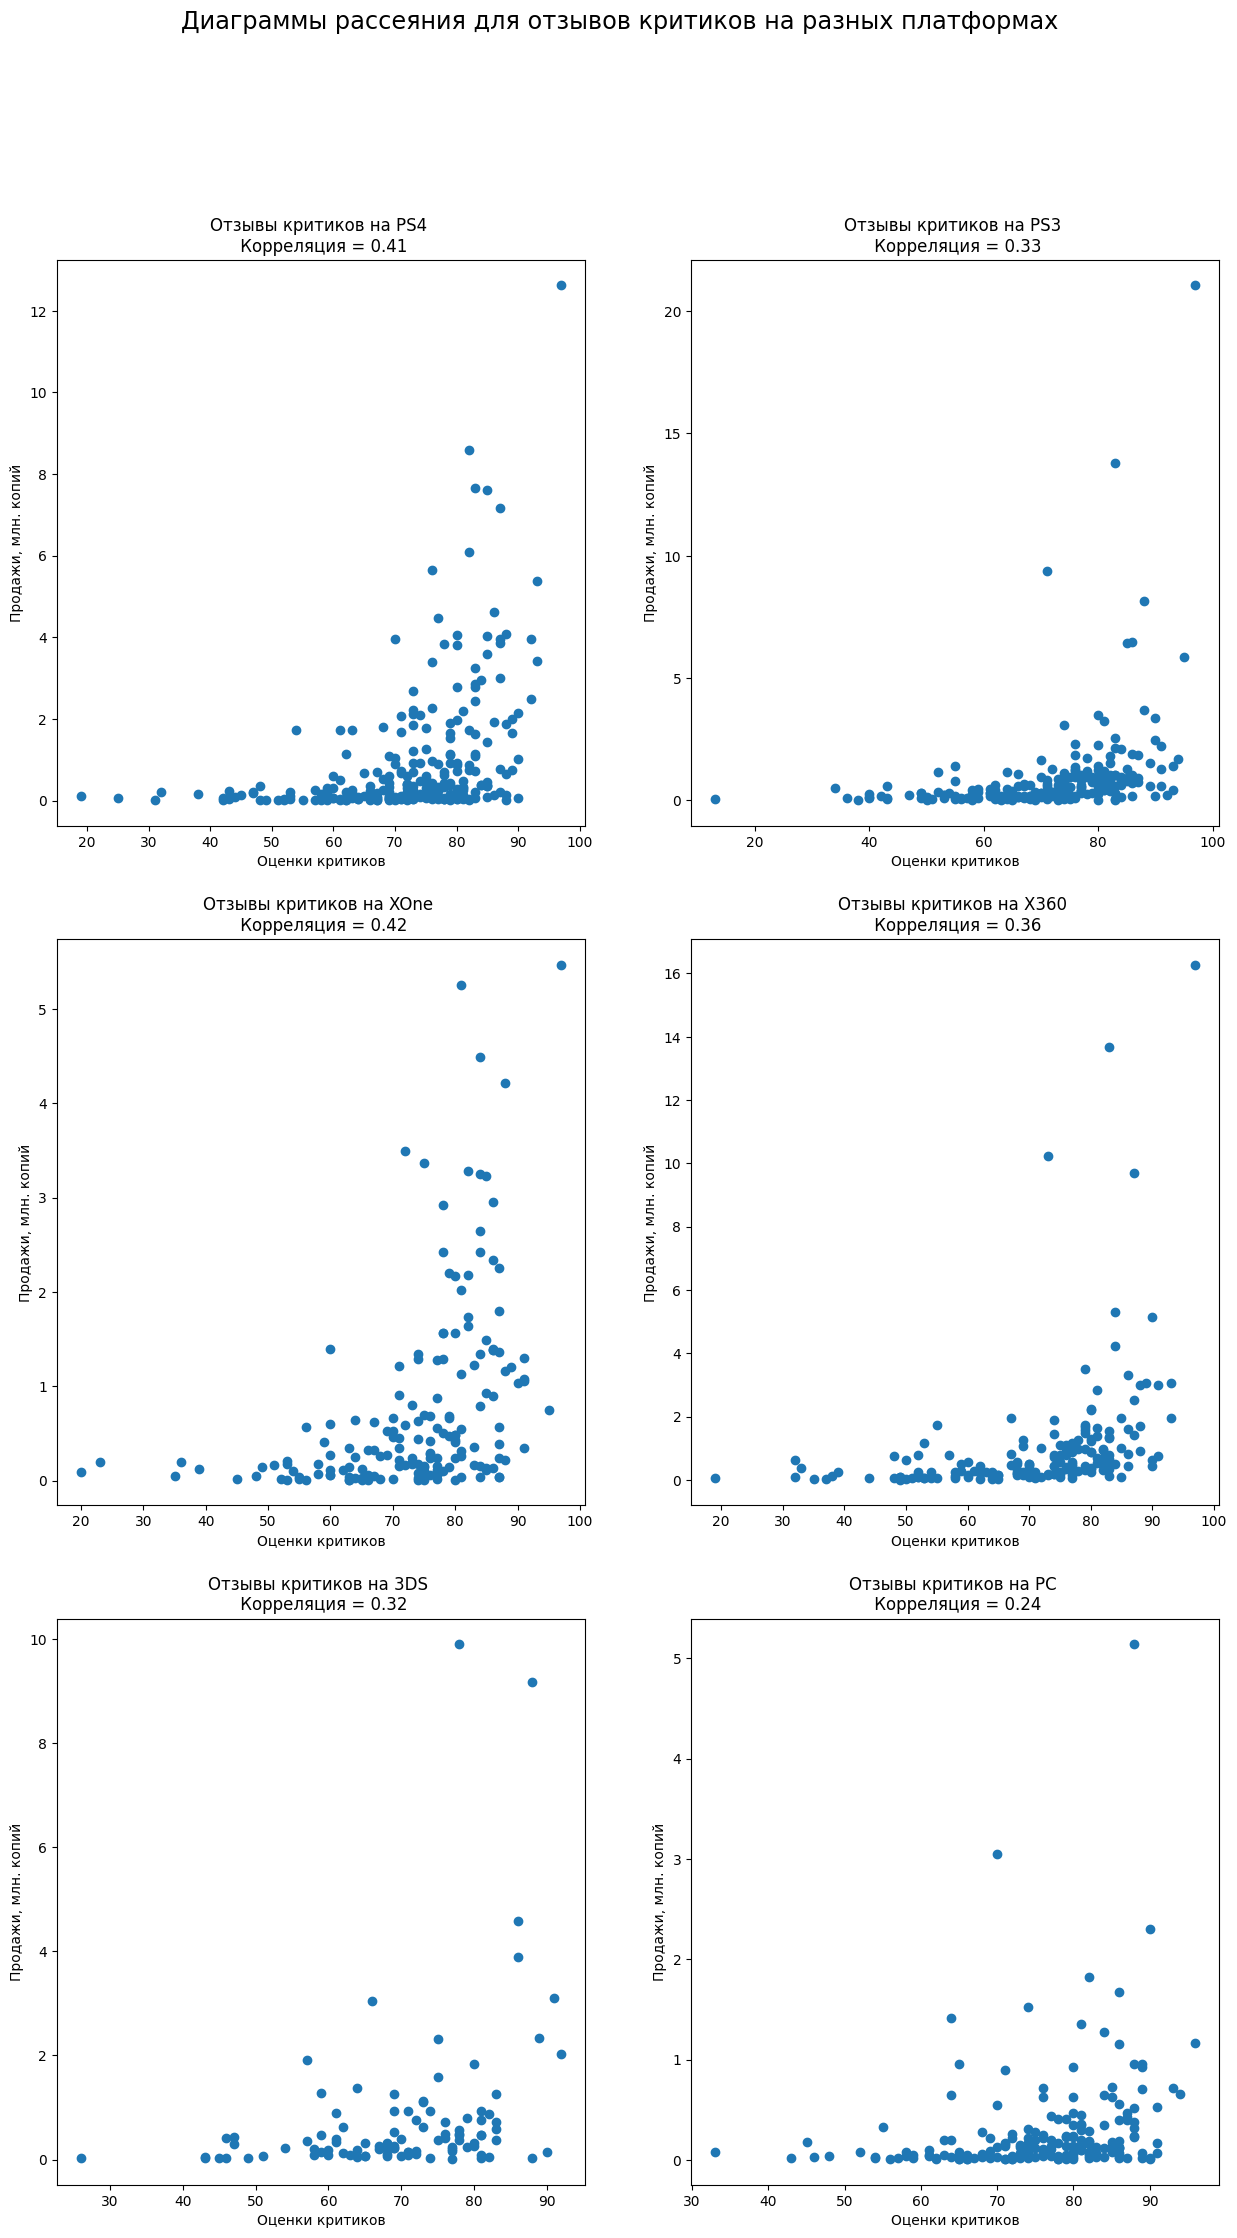

In [41]:
platforms = ['PS4','PS3','XOne','X360','3DS','PC']
plt.figure(figsize=[15, 25])
i = 1
for platform in platforms:
    plt.subplot(3,2,i)
    cor = data_actual.query('platform == @platform')['critic_score'].corr(data_actual.query('platform == @platform')['sum_sales'])
    cor = round(cor,2)
    plt.plot(data_actual.query('platform == @platform')['critic_score'], data_actual.query('platform == @platform')['sum_sales'], 'o')
    plt.title(f'Отзывы критиков на {platform} \n Корреляция = {cor}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи, млн. копий')
    i += 1
plt.suptitle('Диаграммы рассеяния для отзывов критиков на разных платформах', fontsize='xx-large')
plt.show()

<b> Наблюдаем аналогичную картину и на других платформах. Слабая корреляция между оценками критиков и продадами найдена на всех рассматриваемых платформах, кроме PC. Наибольшим значение корреляции обладает XBOXOne

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
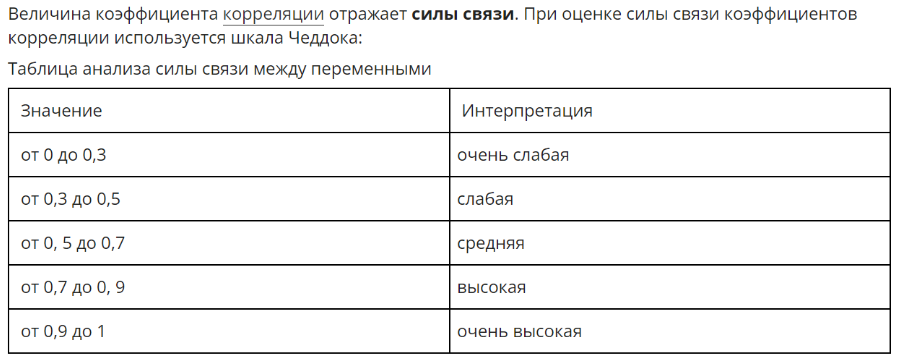

<b> Оценки критиков действительно можно использовать в качестве одного из факторов для прогнозирования успеха в продажах. Чем выше рейтинг критиков, тем более высокие продажи можно ожидать.

### Как влияет жанр на продажи?

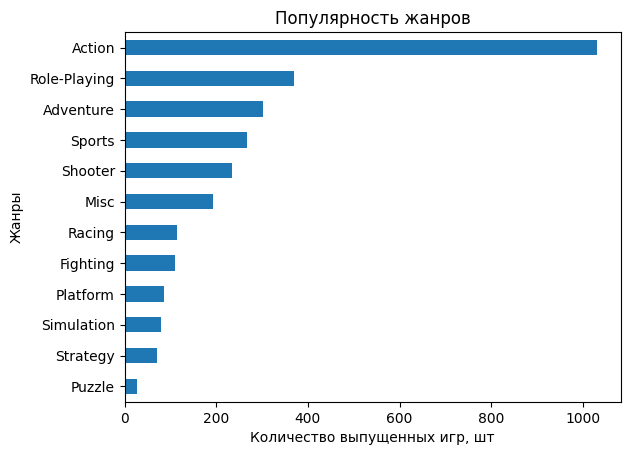

In [42]:
#построим сводную таблицу для жанров
genre_count = data_actual.groupby(['genre']).agg({'genre':'count', 'sum_sales':'median'})
genre_count.columns = ['count', 'sales']

genre_count.sort_values(by = 'count')['count'].plot(kind = 'barh', 
                 title = 'Популярность жанров') 
plt.xlabel('Количество выпущенных игр, шт')
plt.ylabel('Жанры')
plt.show()
                                                    

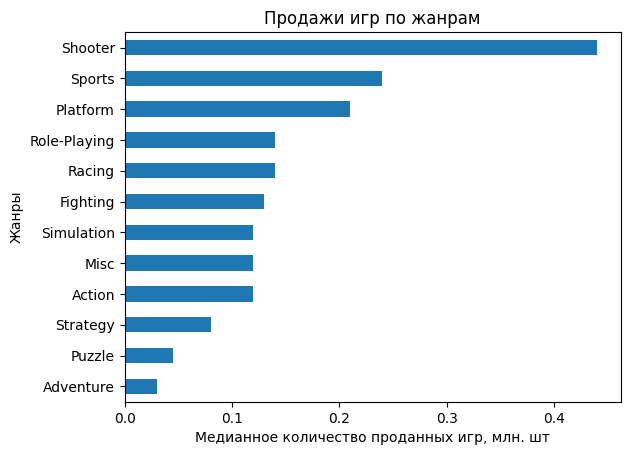

In [43]:
genre_count.sort_values(by = 'sales')['sales'].plot(kind = 'barh', 
                 title = 'Продажи игр по жанрам')
plt.xlabel('Медианное количество проданных игр, млн. шт')
plt.ylabel('Жанры')
plt.show()

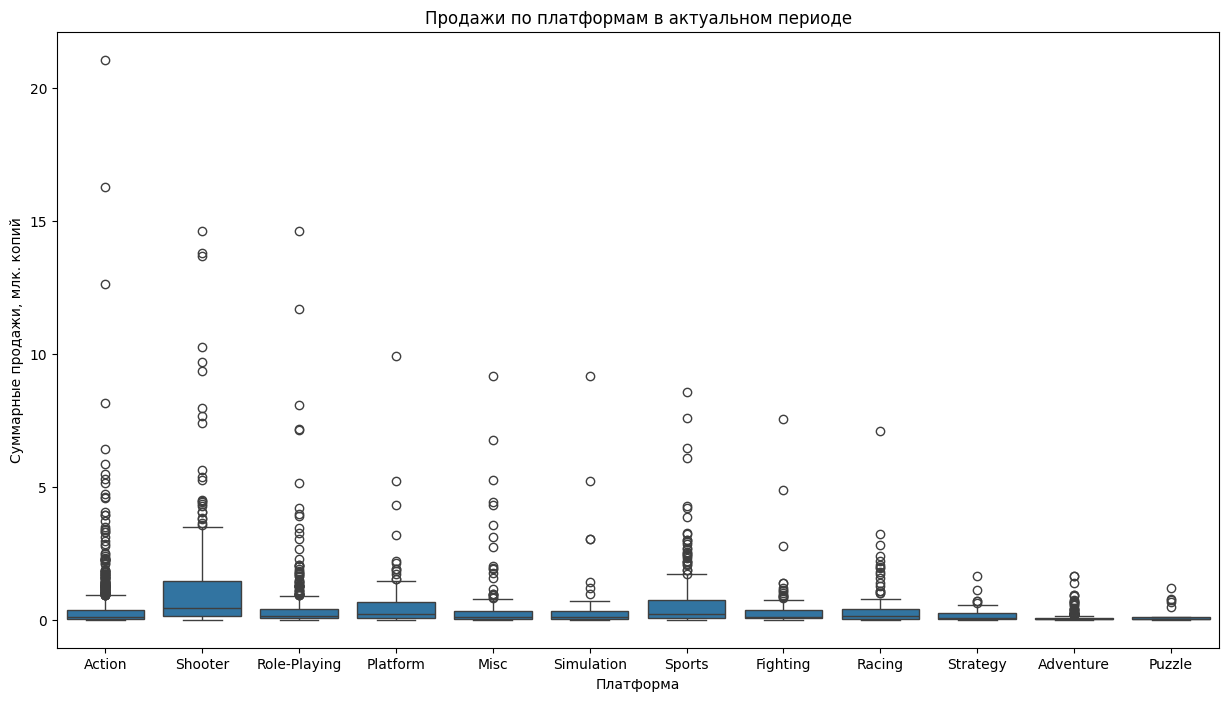

In [44]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'genre', y = 'sum_sales', data = data_actual)
plt.title('Продажи по платформам в актуальном периоде')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млк. копий')
plt.show()

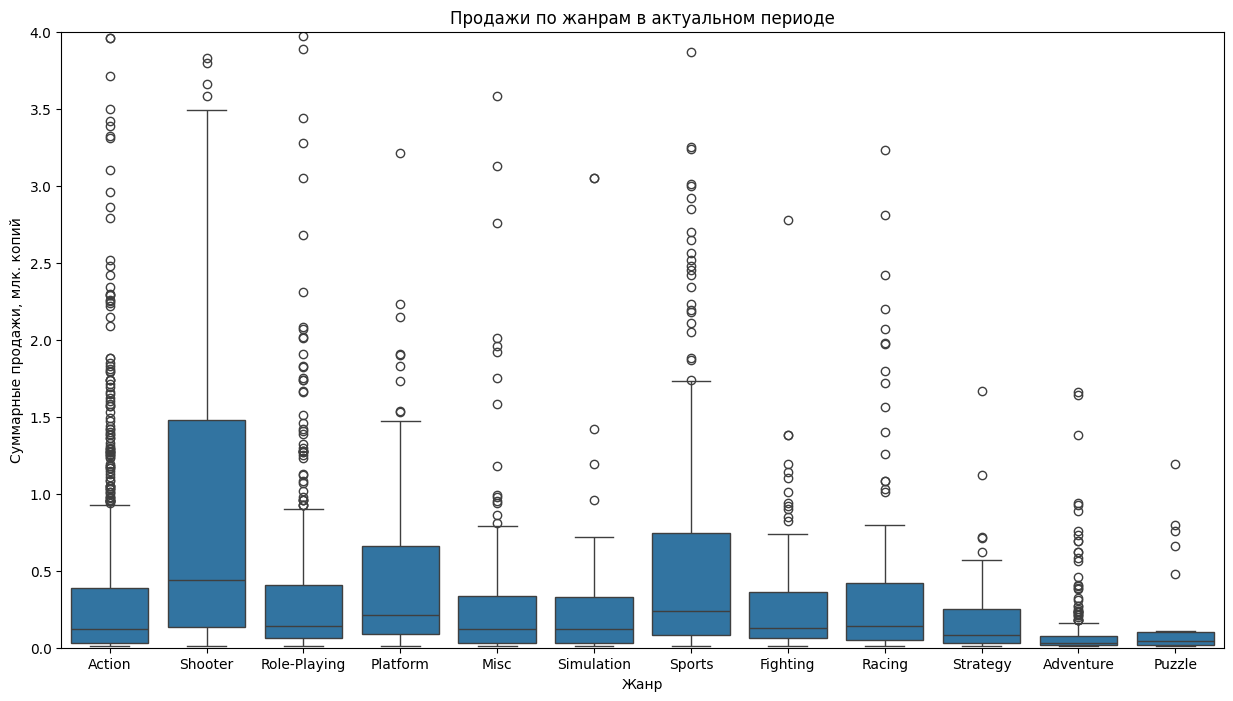

In [45]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'genre', y = 'sum_sales', data = data_actual)
plt.title('Продажи по жанрам в актуальном периоде')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млк. копий')
plt.ylim(0,4)
plt.show()

<b> По количеству выпускаемых игр лидируют Action, Role-playing и Adventure. Однако, по медиальным значениям суммарных продаж топ-3 составляют Shooter, Sports, Platform. Следовательно, данные жанры имеют стабильно высокие уровни продаж. Жанры Action и Role-playing имеют большое количество значений вне межквартильного размаха, что говорит о нестабильности жанров. 

###  Портрет пользователя каждого региона

#### Северная Америка

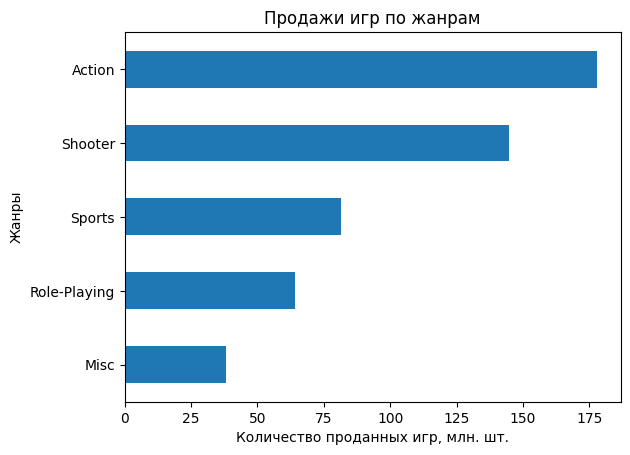

In [46]:
genre_na_sales = data_actual.groupby(['genre']).agg({'na_sales':'sum'})
ax = genre_na_sales.sort_values(by = 'na_sales')['na_sales'].tail().plot(kind = 'barh', 
                 title = 'Продажи игр по жанрам')
plt.xlabel('Количество проданных игр, млн. шт.')
plt.ylabel('Жанры')
plt.show()


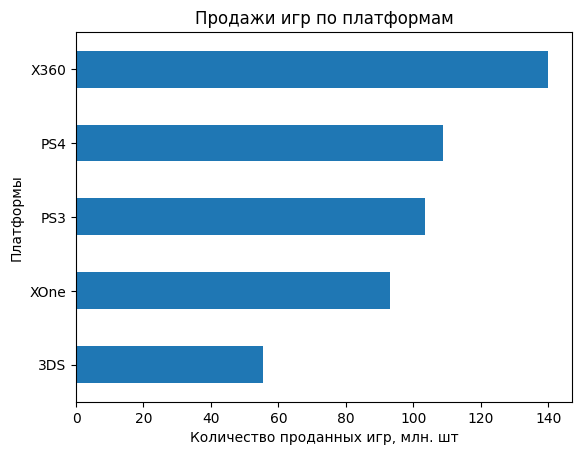

In [47]:
platform_na_sales = data_actual.groupby(['platform']).agg({'na_sales':'sum'})
platform_na_sales.sort_values(by = 'na_sales')['na_sales'].tail().plot(kind = 'barh', 
                 title = 'Продажи игр по платформам')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Платформы')
plt.show()


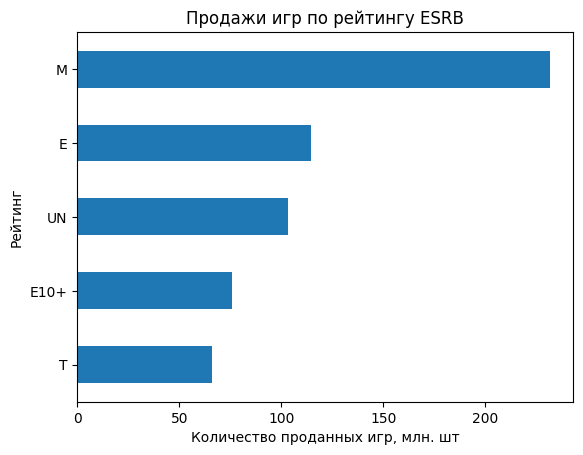

In [48]:
rating_na_sales = data_actual.groupby(['rating']).agg({'na_sales':'sum'})
rating_na_sales.sort_values(by = 'na_sales')['na_sales'].plot(kind = 'barh', 
                 title = 'Продажи игр по рейтингу ESRB')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Рейтинг')
plt.show()


<b> В Северной Америке больше всего продаются игры жанров Action, Shooter и Sports. Самыми популярными платформами являются XBOX360 и PS4 , но и другие консоли прошлого поколения также составляют значительную часть от продаж. Более 200 млн. копий игр было продано в рейтинге M (17+) и более 100 млн. копий в жанре Action, что полностью согласуется с топом по жанрам.

#### Европа

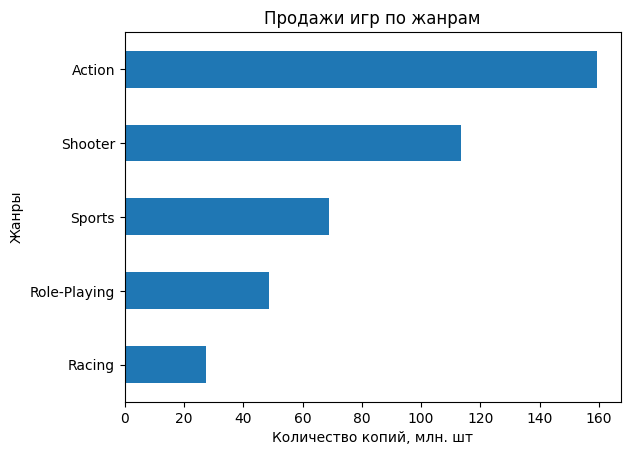

In [49]:
genre_eu_sales = data_actual.groupby(['genre']).agg({'eu_sales':'sum'})
genre_eu_sales.sort_values(by = 'eu_sales')['eu_sales'].tail().plot(kind = 'barh', 
                 title = 'Продажи игр по жанрам')
plt.xlabel('Количество копий, млн. шт')
plt.ylabel('Жанры')
plt.show()

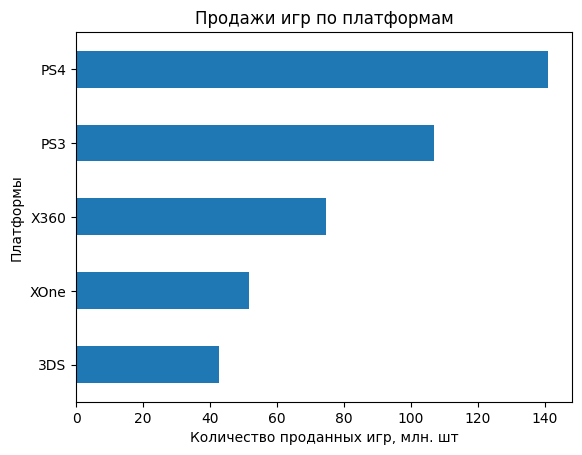

In [50]:
platform_eu_sales = data_actual.groupby(['platform']).agg({'eu_sales':'sum'})
platform_eu_sales.sort_values(by = 'eu_sales')['eu_sales'].tail().plot(kind = 'barh', 
                 title = 'Продажи игр по платформам')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Платформы')
plt.show()

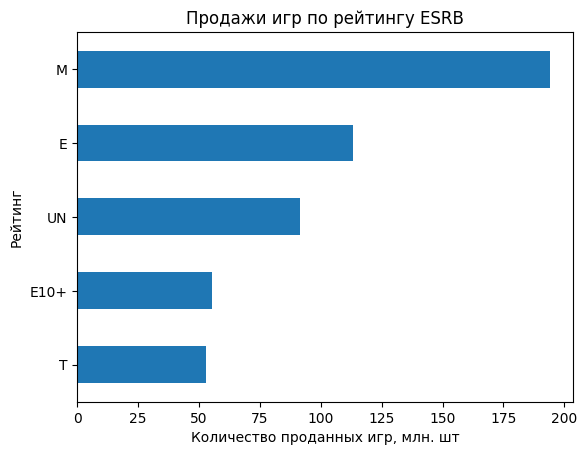

In [51]:
rating_eu_sales = data_actual.groupby(['rating']).agg({'eu_sales':'sum'})
rating_eu_sales.sort_values(by = 'eu_sales')['eu_sales'].plot(kind = 'barh', 
                 title = 'Продажи игр по рейтингу ESRB')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Рейтинг')
plt.show()

<b> В Европе наблюдается аналогичная статистика по жанрам и рейтингу. Самыми популярными жанрами являются экшн и шутеры, но последнее место в топе сменилось с Misc на Racing. Самыми популярными платформами являются PS4 и PS3. Пользователи данного региона предпочитают консоли от Sony.
    

#### Япония

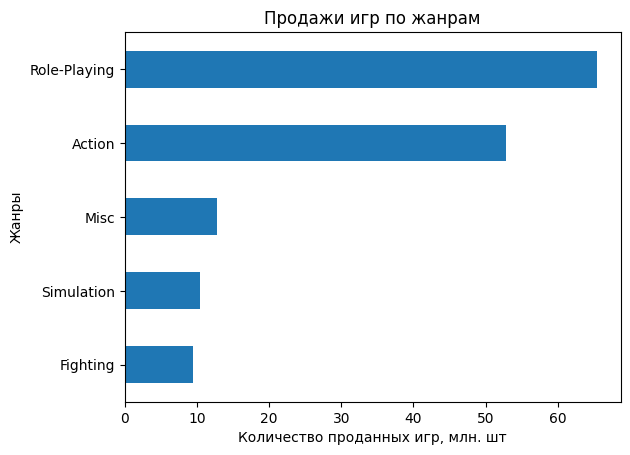

In [52]:
genre_jp_sales = data_actual.groupby(['genre']).agg({'jp_sales':'sum'})
genre_jp_sales.sort_values(by = 'jp_sales')['jp_sales'].tail().plot(kind = 'barh', 
                 title = 'Продажи игр по жанрам')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Жанры')
plt.show()

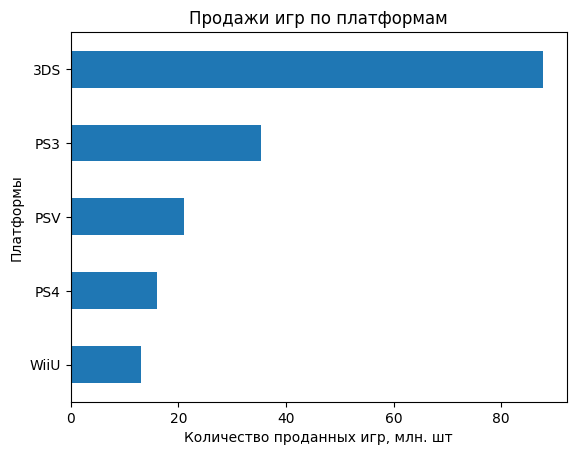

In [53]:
platform_jp_sales = data_actual.groupby(['platform']).agg({'jp_sales':'sum'})
platform_jp_sales.sort_values(by = 'jp_sales')['jp_sales'].tail().plot(kind = 'barh', 
                 title = 'Продажи игр по платформам')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Платформы')
plt.show()

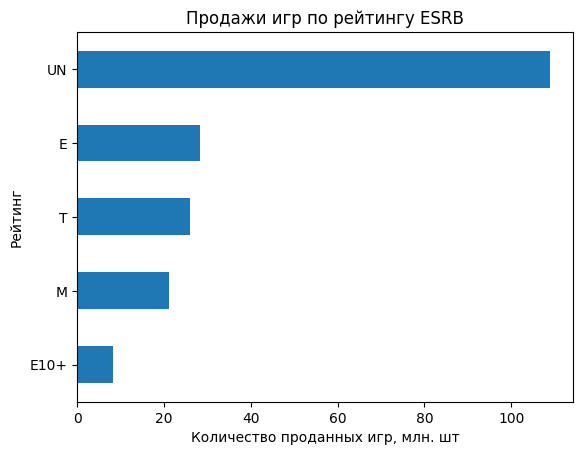

In [54]:
rating_jp_sales = data_actual.groupby(['rating']).agg({'jp_sales':'sum'})
rating_jp_sales.sort_values(by = 'jp_sales')['jp_sales'].plot(kind = 'barh', 
                 title = 'Продажи игр по рейтингу ESRB')
plt.xlabel('Количество проданных игр, млн. шт')
plt.ylabel('Рейтинг')
plt.show()


<b> В Японии совершенно другой портрет пользователя. Предпочтения отдаются консолям 3ds и PS3 и играм жанров Role-playing и Action. Отсюда следует и распределение проданных копий по рейтингу: наиболее популярные игры имеют более детский рейтинг (T и E). Рейтинг ESRB не так используется в Японии. Большая часть проданных игр не имеет рейтинга от данной организации.

#### Итоговое представление в виде pie

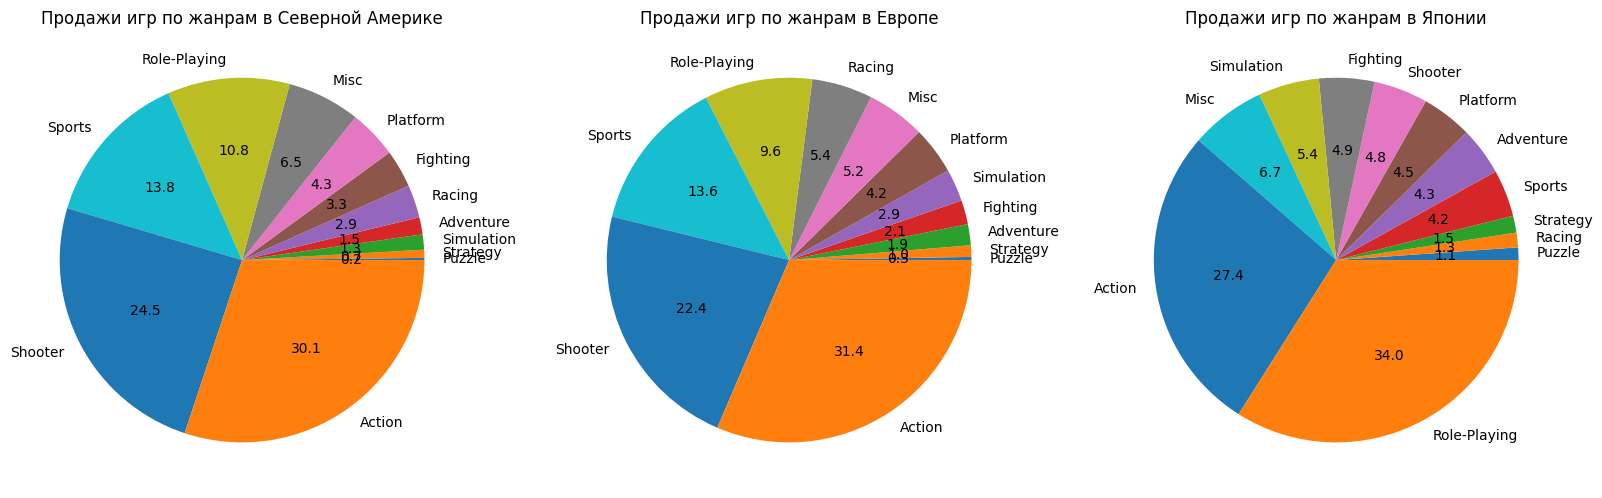

In [55]:
#Построим pie
#Вижу, что есть проблемы с наслоением малых групп. Пока не нашел, как хорошо переделать жанр в категорию "Другое"
#Обязательно разберусь с этим
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
genre_na_sales.sort_values(by = 'na_sales')['na_sales'].plot(kind = 'pie', 
                 title = 'Продажи игр по жанрам в Северной Америке',ylabel = '', autopct='%.1f')
plt.subplot(1,3,2)
genre_eu_sales.sort_values(by = 'eu_sales')['eu_sales'].plot(kind = 'pie', 
                 title = 'Продажи игр по жанрам в Европе', ylabel = '', autopct='%.1f')
plt.subplot(1,3,3)
genre_jp_sales.sort_values(by = 'jp_sales')['jp_sales'].plot(kind = 'pie',
                 title = 'Продажи игр по жанрам в Японии',ylabel = '', autopct='%.1f')
plt.show()




<b> Подведем итог по регионам. В Северной Америке и Европе чаще всего покупают шутеры и экшн игры для акутальных консолей. В Европе отдают предпочтения линейке PlayStation, а в Северной Америке популярны оба производителя консолей. В Японии же пользователи играют на портативных консолях в Role-Playing и Action для платформ PS3 и 3DS

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Рассмотрим распределение рейтингов на этих платформах

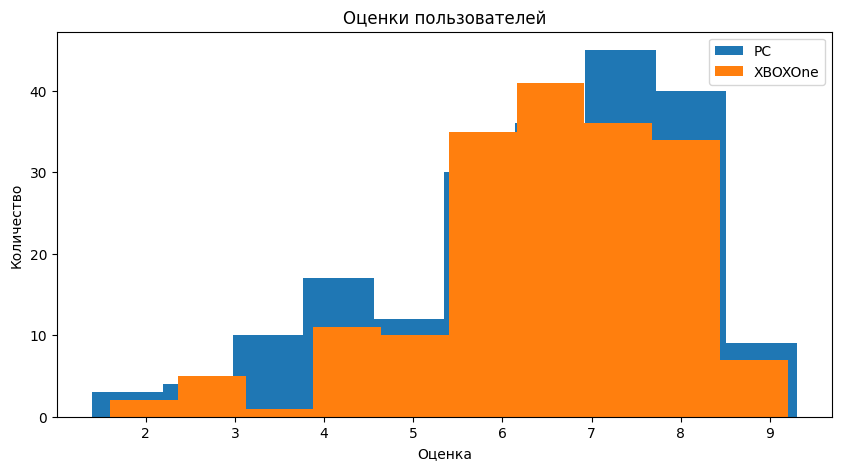

Количество отзывов на PC: 206
Количество отзывов на XBOXOne: 182


In [56]:
ax = data_actual.query('platform == "PC"')['user_score'].plot(kind = 'hist', figsize = (10,5))

data_actual.query('platform == "XOne"')['user_score'].plot(kind = 'hist', ax = ax)
plt.title('Оценки пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend(['PC', 'XBOXOne'])
plt.show()
print('Количество отзывов на PC:', data_actual.query('platform == "PC"')['user_score'].count())
print('Количество отзывов на XBOXOne:', data_actual.query('platform == "XOne"')['user_score'].count())

Оценки распеределены ассиметрично с удлиненным левым концом. Размер выборки позволяет использовать t-test Уэлча. Он использует центральную предельную теорему и распределение выборочных средних. Для применения не обязательна нормальность распределения. В случае нервенства дисперсий необходимо использовать соотвествующую поправку.
Для данной гипотезы будет достаточно уровня значимости = 0,05.

H0: Средние пользовательские оценки на платформах PC и XBOXOne равны


H1: Средние пользовательские оценки на платформах PC и XBOXOne различны

In [57]:
# Проверим равенство дисперсий
print('Дисперсии отличаются на',
round((data_actual.query('platform == "XOne"')['user_score'].var() - data_actual.query('platform == "PC"')['user_score'].var())/max(data_actual.query('platform == "XOne"')['user_score'].var(),data_actual.query('platform == "PC"')['user_score'].var() ),2)*100, '%')

  

Дисперсии отличаются на -31.0 %


In [58]:
#Будем использовать t-тест Уэлча с поправкой на разные дисперсии и пропуски. 
alpha = 0.05
res = st.ttest_ind(data_actual.query('platform == "XOne"')['user_score'],
                   data_actual.query('platform == "PC"')['user_score'], 
                   equal_var=False, nan_policy = 'omit')


if res.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('p-value = ', res.pvalue)

Не отвергаем нулевую гипотезу
p-value =  0.5489537965134912


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что использован параметр отфильтровывающий пропуски. 👍</font>

<b> На основании t-теста Уэлча не удалось опровергнуть нулевую гипотезу на уровне значимости 0.05. 
    
Средние пользовательские оценки на платформах PC и XBOXOne равны


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

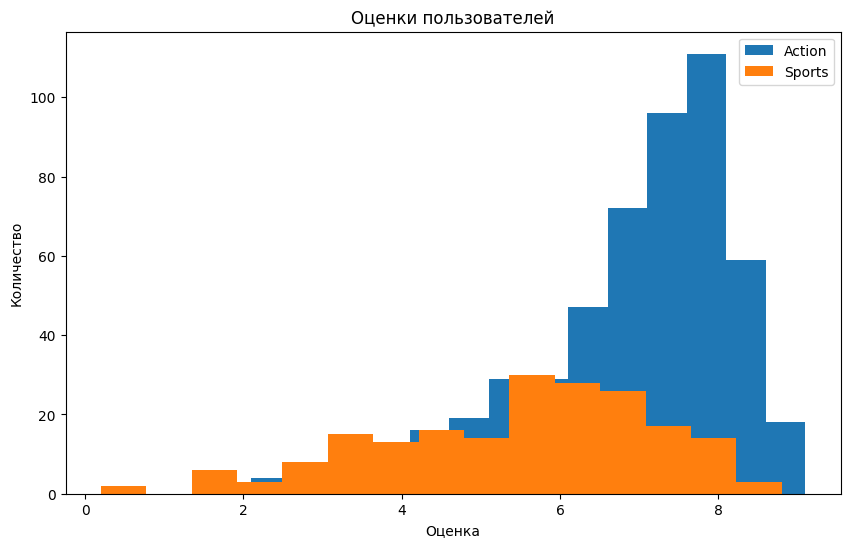

In [59]:
ax = data_actual.query('genre == "Action"')['user_score'].plot(kind = 'hist', bins = 15, figsize = (10,6))

data_actual.query('genre == "Sports"')['user_score'].plot(kind = 'hist', ax = ax, bins = 15)
plt.title('Оценки пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend(['Action', 'Sports'])
plt.show()

<b> Поступим аналогично прошлому пункту

In [60]:
# Проверим равенство дисперсий
print('Дисперсии отличаются на',
round((data_actual.query('genre == "Action"')['user_score'].var() - data_actual.query('genre == "Sports"')['user_score'].var())/max(data_actual.query('genre == "Action"')['user_score'].var(),data_actual.query('genre == "Sports"')['user_score'].var() ),2)*100, '%')


Дисперсии отличаются на -38.0 %


<b>
Гипотезы:
    
    
H0: Средние пользовательские оценки для жанров Action и Sports равны


H1: Средние пользовательские оценки для жанров Action и Sports различны

In [61]:
#Будем использовать t-тест Уэлча с поправкой на разные дисперсии и пропуски. 
alpha = 0.05
res = st.ttest_ind(data_actual.query('genre == "Action"')['user_score'],data_actual.query('genre == "Sports"')['user_score'], equal_var=False, nan_policy = 'omit')


if res.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('p-value = ', res.pvalue)

Отвергаем нулевую гипотезу
p-value =  4.24307776572644e-20


In [62]:
print('Статистика по жанру Action')
print(data_actual.query('genre == "Action"')['user_score'].describe())
print()
print('Статистика по жанру Sports')
data_actual.query('genre == "Sports"')['user_score'].describe()

Статистика по жанру Action
count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Статистика по жанру Sports


count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


<b> Получаем, что средние пользовательские оценки в жанре Action достоверно больше чем в жанре Sports на уровне значимости 0.05 при использовании t-теста Уэлча. 

## Выводы:

#### Предобработка данных: 
- Было обнаружено большое количество пропусков в данных по рейтингу и отзывам пользователей и критиков. Рейтинги были заполнены значением UN (unrated). Отзывы заполнить невозможно. Пропуски можно объяснить добавлением информации из открытых источников. Отзывы и рейтинг могли отсутвовать в избраных источниках. 
- Был добавлен столбец с суммарными продажами игр

#### Анализ данных: 
- После рассмотрения количества выпускаемых игр по годам было принято решение рассматривать промежуток с 1984 по 2016. После анализа продаж игр по платфомам рассматриваемый промежуток уменьшился. Актуальный промежуток - с 2013 года (момент запуска консолей нового поколения)
- До появления PS4 и XboxOne период жизни платформ составлял около 10 лет (по консолям PS2, PS3, Xbox360, Wii). Теперь период жизни составляет 4-5 лет. Медианный период жизни составляет 7 лет.
- По суммарным продажам можно выявить топ три жанра игр: action, sports и shooter. 
- По региональным продажам можно выявить портрет типичного пользователя:
  * Северная Америка: Любимые жанры: экшн, шутер, спорт. Платформы: PS4, XBOXOne
  * Европа: Любимые жанры: экшн, шутер, спорт. Платформы: PS4, PS3
  * Япония: Любимые жанры: экшн, role-playing. Платформы: 3DS, PS3
- Зависимость продаж от рейтингов критиков имеет более сильную корреляцию, чем от отзывов пользователей. Рейтинги критиков можно использовать как фактор успеха в продажах


#### Проверка гипотез:
1. Средние пользовательские рейтинги для игр на PC не отличимы от рейтингов на XBOXOne на уровне значимости 0.05.
2. Cредние пользовательские рейтинги в жанре Action достоверно больше чем в жанре Sports на уровне значимости 0.05.


#### Общий вывод:
Рекламную компанию можно сконцентрировать на играх для PS4 c учетом самых популярных жанрах в регионах. Для Северной Америки и Европы в качестве факторов успешности игры можно учитывать не только отзывы критиков, но и рейтинг от ESRB. 